# imports

In [1]:
# import state dicts and so on from evaluate_multi_task.py
from evaluate_multi_task import *

You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


[22:18:17] INFO     =======load pretrained model and tokenizer========                   ]8;id=288910;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=798487;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=14033;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=929631;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=4_step=2000.pth', 'epoch=3_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-cola/standard/version_1/checkpoints                                     

           INFO     load checkpoint from epoch=4_step=2000.pth                           ]8;id=814910;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=30082;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

[22:18:18] INFO     ==================================================                   ]8;id=289170;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=897004;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                    ]8;id=946785;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=761082;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

[22:19:11] INFO     no peft config found, use full finetuning.                                   ]8;id=382732;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py\finetune_lm.py]8;;\:]8;id=777416;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py#147\147]8;;\

           INFO     ==================================================                    ]8;id=721524;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=615792;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

Using the latest cached version of the module from /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely on the Hugging Face Hub.


[22:20:51] WARNING  Using the latest cached version of the module from                                 ]8;id=705052;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py\load.py]8;;\:]8;id=248076;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py#1252\1252]8;;\
                    /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dac             
                    be3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on                
                    Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely             
                    on the Hugging Face Hub.                                                                       

           INFO     =======load pretrained model and tokenizer========                   ]8;id=139617;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=321779;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=18540;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=642052;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=4_step=2000.pth', 'epoch=3_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-cola/lora/version_4/checkpoints                                         

           INFO     load checkpoint from epoch=4_step=2000.pth                           ]8;id=216052;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=121758;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=761206;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=440584;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                    ]8;id=673477;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=265853;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

[22:21:44] INFO     set peft seed to 42                                                          ]8;id=408751;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py\finetune_lm.py]8;;\:]8;id=933615;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py#140\140]8;;\

Global seed set to 42


trainable params: 1,769,472 || all params: 249,347,328 || trainable%: 0.7096414524241463


           INFO     ==================================================                    ]8;id=288389;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=256787;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

Using the latest cached version of the module from /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely on the Hugging Face Hub.


[22:23:24] WARNING  Using the latest cached version of the module from                                 ]8;id=709570;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py\load.py]8;;\:]8;id=776646;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py#1252\1252]8;;\
                    /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dac             
                    be3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on                
                    Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely             
                    on the Hugging Face Hub.                                                                       

           INFO     =======load pretrained model and tokenizer========                   ]8;id=442417;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=33326;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=529903;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=631262;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=4_step=2000.pth', 'epoch=3_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-cola/l_lora/version_7/checkpoints                                       

           INFO     load checkpoint from epoch=4_step=2000.pth                           ]8;id=681453;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=735392;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=617889;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=291704;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                    ]8;id=844962;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=167414;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

[22:24:17] INFO     set peft seed to 42                                                          ]8;id=163032;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py\finetune_lm.py]8;;\:]8;id=225772;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py#140\140]8;;\

Global seed set to 42


trainable params: 1,769,472 || all params: 293,584,128 || trainable%: 0.6027137815842688


           INFO     ==================================================                    ]8;id=288389;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=256787;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

Using the latest cached version of the module from /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely on the Hugging Face Hub.


[22:25:57] WARNING  Using the latest cached version of the module from                                 ]8;id=709570;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py\load.py]8;;\:]8;id=776646;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py#1252\1252]8;;\
                    /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dac             
                    be3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on                
                    Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely             
                    on the Hugging Face Hub.                                                                       

           INFO     =======load pretrained model and tokenizer========                   ]8;id=442417;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=33326;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     load checkpoint from epoch=0_step=2000.pth                           ]8;id=529903;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=631262;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

[22:25:58] INFO     ==================================================                   ]8;id=681453;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=735392;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                    ]8;id=617889;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=291704;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

[22:26:50] INFO     no peft config found, use full finetuning.                                   ]8;id=844962;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py\finetune_lm.py]8;;\:]8;id=167414;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py#147\147]8;;\

           INFO     ==================================================                    ]8;id=163032;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=225772;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

Using the latest cached version of the module from /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely on the Hugging Face Hub.


[22:28:30] WARNING  Using the latest cached version of the module from                                 ]8;id=398382;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py\load.py]8;;\:]8;id=101414;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py#1252\1252]8;;\
                    /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dac             
                    be3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on                
                    Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely             
                    on the Hugging Face Hub.                                                                       

[22:28:31] INFO     =======load pretrained model and tokenizer========                   ]8;id=277370;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=846335;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=130889;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=967096;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=0_step=2000.pth', 'epoch=1_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-mnli/lora/version_7/checkpoints                                         

           INFO     load checkpoint from epoch=0_step=2000.pth                           ]8;id=869693;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=659176;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=605397;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=201629;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                   ]8;id=238968;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=810620;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=908573;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=105907;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=0_step=2000.pth', 'epoch=1_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-mnli/l_lora/version_7/checkpoints                                       

           INFO     load checkpoint from epoch=0_step=2000.pth                           ]8;id=874628;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=382554;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=702729;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=279946;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                   ]8;id=74870;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=638720;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=256702;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=171339;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=8_step=2000.pth', 'epoch=9_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-mrpc/standard/version_1/checkpoints                                     

           INFO     load checkpoint from epoch=8_step=2000.pth                           ]8;id=671088;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=721590;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=883794;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=805635;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

[22:28:32] INFO     =======load pretrained model and tokenizer========                    ]8;id=33659;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=844151;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

[22:29:24] INFO     no peft config found, use full finetuning.                                   ]8;id=221231;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py\finetune_lm.py]8;;\:]8;id=957492;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py#147\147]8;;\

           INFO     ==================================================                    ]8;id=329963;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=222955;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

Using the latest cached version of the module from /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely on the Hugging Face Hub.


[22:31:04] WARNING  Using the latest cached version of the module from                                 ]8;id=958972;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py\load.py]8;;\:]8;id=674079;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py#1252\1252]8;;\
                    /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dac             
                    be3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on                
                    Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely             
                    on the Hugging Face Hub.                                                                       

           INFO     =======load pretrained model and tokenizer========                   ]8;id=258607;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=781177;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=612982;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=449245;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=8_step=2000.pth', 'epoch=9_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-mrpc/lora/version_7/checkpoints                                         

           INFO     load checkpoint from epoch=8_step=2000.pth                           ]8;id=229974;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=145051;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=49405;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=902931;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                   ]8;id=830555;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=713536;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=400156;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=624834;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=8_step=2000.pth', 'epoch=9_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-mrpc/l_lora/version_5/checkpoints                                       

           INFO     load checkpoint from epoch=8_step=2000.pth                           ]8;id=902592;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=988210;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=714825;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=927767;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                   ]8;id=672097;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=356699;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=475763;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=3402;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=0_step=2000.pth', 'epoch=1_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-qqp/standard/version_1/checkpoints                                      

           INFO     load checkpoint from epoch=0_step=2000.pth                           ]8;id=524902;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=798975;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

[22:31:05] INFO     ==================================================                   ]8;id=912804;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=655674;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                    ]8;id=638551;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=208573;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

[22:31:57] INFO     no peft config found, use full finetuning.                                   ]8;id=565579;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py\finetune_lm.py]8;;\:]8;id=999816;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py#147\147]8;;\

           INFO     ==================================================                    ]8;id=599;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=628038;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

Using the latest cached version of the module from /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely on the Hugging Face Hub.


[22:33:37] WARNING  Using the latest cached version of the module from                                 ]8;id=974230;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py\load.py]8;;\:]8;id=380612;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py#1252\1252]8;;\
                    /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dac             
                    be3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on                
                    Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely             
                    on the Hugging Face Hub.                                                                       

[22:33:38] INFO     =======load pretrained model and tokenizer========                   ]8;id=251083;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=60738;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=82582;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=89814;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=0_step=2000.pth', 'epoch=1_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-qqp/lora/version_7/checkpoints                                          

           INFO     load checkpoint from epoch=0_step=2000.pth                           ]8;id=797549;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=558582;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=498369;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=992842;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                   ]8;id=914812;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=636059;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=791952;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=765388;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=0_step=2000.pth', 'epoch=1_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-qqp/l_lora/version_6/checkpoints                                        

           INFO     load checkpoint from epoch=0_step=2000.pth                           ]8;id=418373;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=704314;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=542717;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=473417;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                   ]8;id=354508;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=22056;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=230914;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=7540;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=12_step=2000.pth', 'epoch=13_step=2000.pth'], checkpoint                               
                    dir: logs/flan-t5-base/glue-rte/standard/version_0/checkpoints                                 

           INFO     load checkpoint from epoch=12_step=2000.pth                          ]8;id=240062;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=70674;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=74299;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=539131;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                    ]8;id=224643;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=565427;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

[22:34:30] INFO     no peft config found, use full finetuning.                                   ]8;id=598782;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py\finetune_lm.py]8;;\:]8;id=604201;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py#147\147]8;;\

           INFO     ==================================================                    ]8;id=846721;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=426833;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

Using the latest cached version of the module from /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely on the Hugging Face Hub.


[22:36:11] WARNING  Using the latest cached version of the module from                                 ]8;id=451989;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py\load.py]8;;\:]8;id=371507;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py#1252\1252]8;;\
                    /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dac             
                    be3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on                
                    Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely             
                    on the Hugging Face Hub.                                                                       

           INFO     =======load pretrained model and tokenizer========                   ]8;id=764491;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=56802;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=63556;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=422179;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=12_step=2000.pth', 'epoch=13_step=2000.pth'], checkpoint                               
                    dir: logs/flan-t5-base/glue-rte/lora/version_4/checkpoints                                     

           INFO     load checkpoint from epoch=12_step=2000.pth                          ]8;id=114576;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=260735;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=146991;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=442374;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                   ]8;id=916964;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=968114;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=897546;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=577057;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=12_step=2000.pth', 'epoch=13_step=2000.pth'], checkpoint                               
                    dir: logs/flan-t5-base/glue-rte/l_lora/version_7/checkpoints                                   

           INFO     load checkpoint from epoch=12_step=2000.pth                          ]8;id=876638;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=15474;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=247861;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=174389;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                   ]8;id=906651;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=420521;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=2260;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=409386;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=0_step=2000.pth', 'epoch=1_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-sst2/standard/version_0/checkpoints                                     

           INFO     load checkpoint from epoch=0_step=2000.pth                           ]8;id=477110;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=299105;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

[22:36:12] INFO     ==================================================                   ]8;id=582765;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=694022;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                    ]8;id=311120;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=228275;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

[22:37:04] INFO     no peft config found, use full finetuning.                                   ]8;id=63918;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py\finetune_lm.py]8;;\:]8;id=784309;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py#147\147]8;;\

           INFO     ==================================================                    ]8;id=499948;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=527276;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

Using the latest cached version of the module from /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely on the Hugging Face Hub.


[22:38:44] WARNING  Using the latest cached version of the module from                                 ]8;id=59642;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py\load.py]8;;\:]8;id=532496;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py#1252\1252]8;;\
                    /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dac             
                    be3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on                
                    Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely             
                    on the Hugging Face Hub.                                                                       

           INFO     =======load pretrained model and tokenizer========                   ]8;id=623939;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=71262;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=125710;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=987335;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=0_step=2000.pth', 'epoch=1_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-sst2/lora/version_5/checkpoints                                         

           INFO     load checkpoint from epoch=0_step=2000.pth                           ]8;id=623398;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=41672;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=612024;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=592683;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                   ]8;id=214181;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=702258;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=415011;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=137235;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=0_step=2000.pth', 'epoch=1_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-sst2/l_lora/version_5/checkpoints                                       

           INFO     load checkpoint from epoch=0_step=2000.pth                           ]8;id=331535;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=974146;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=480547;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=651332;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                   ]8;id=223508;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=530458;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=923653;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=72132;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=5_step=2000.pth', 'epoch=6_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-stsb/standard/version_1/checkpoints                                     

           INFO     load checkpoint from epoch=5_step=2000.pth                           ]8;id=165409;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=459469;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

[22:38:45] INFO     ==================================================                   ]8;id=641390;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=846305;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                    ]8;id=856795;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=581542;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

[22:39:37] INFO     no peft config found, use full finetuning.                                   ]8;id=984539;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py\finetune_lm.py]8;;\:]8;id=920782;file:///data/users/tanganke/projects/task_arithmetic/peta/finetune_lm.py#147\147]8;;\

           INFO     ==================================================                    ]8;id=112235;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=778480;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#79\79]8;;\

Using the latest cached version of the module from /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely on the Hugging Face Hub.


[22:41:17] WARNING  Using the latest cached version of the module from                                 ]8;id=634210;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py\load.py]8;;\:]8;id=220861;file:///data/users/tanganke/anaconda3/lib/python3.10/site-packages/datasets/load.py#1252\1252]8;;\
                    /data/users/tanganke/.cache/huggingface/modules/datasets_modules/datasets/glue/dac             
                    be3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad (last modified on                
                    Tue Aug  1 12:12:31 2023) since it couldn't be found locally at glue., or remotely             
                    on the Hugging Face Hub.                                                                       

[22:41:18] INFO     =======load pretrained model and tokenizer========                   ]8;id=665046;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=894343;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=949314;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=952273;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=5_step=2000.pth', 'epoch=6_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-stsb/lora/version_7/checkpoints                                         

           INFO     load checkpoint from epoch=5_step=2000.pth                           ]8;id=444151;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=869634;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=808577;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=137174;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           INFO     =======load pretrained model and tokenizer========                   ]8;id=463298;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=578478;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

           WARNING  multiple checkpoints found, found checkpoints:                       ]8;id=117308;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=78898;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#327\327]8;;\
                    ['epoch=5_step=2000.pth', 'epoch=6_step=2000.pth'], checkpoint dir:                            
                    logs/flan-t5-base/glue-stsb/l_lora/version_7/checkpoints                                       

           INFO     load checkpoint from epoch=5_step=2000.pth                           ]8;id=156294;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=572092;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#331\331]8;;\

           INFO     ==================================================                   ]8;id=579364;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py\evaluate_multi_task.py]8;;\:]8;id=155287;file:///data/users/tanganke/projects/task_arithmetic/peta/evaluate_multi_task.py#307\307]8;;\

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from peta.tasks.ties_merging import (
    normalize,
    state_dict_to_vector,
    vector_to_state_dict,
)

mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.size"] = 12

# Task embeddings

In [3]:
val_loaders_with_batch_size_1 = {}
for dataset_name in DATASET_NAMES:
    val_loaders_with_batch_size_1[dataset_name] = DataLoader(
        val_datasets[dataset_name],
        batch_size=1,
        shuffle=False,
        collate_fn=default_data_collator,
    )
    # val_loaders_with_batch_size_1[dataset_name] = fabric.setup_dataloaders(
    #     val_loaders_with_batch_size_1[dataset_name]
    # )

In [4]:
model = deepcopy(fft_pretrained_model)
# model = fabric.setup_module(model)
model.eval()

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

In [5]:
def compute_task_embedding(model, batch):
    outputs = model(**batch)
    # Extract logits from model output
    logits = outputs.logits

    # Compute log probabilities
    log_probs = F.log_softmax(logits, dim=-1)

    # Get the true labels
    labels = batch["labels"]

    # Mask out padding labels of -100
    padding_mask = labels != -100

    # Apply mask before gathering
    log_probs = log_probs.masked_select(padding_mask.unsqueeze(-1))
    log_probs = log_probs.view(-1, logits.size(-1))
    labels = labels.masked_select(padding_mask)

    # # Compute log likelihood for the true labels
    log_probs = torch.gather(log_probs, 1, labels.unsqueeze(-1)).squeeze(-1)

    # # Compute gradients of log likelihoods w.r.t. model parameters
    log_likelihood_grads = torch.autograd.grad(log_probs.sum(), model.parameters())

    # # Estimate Fisher information matrix as outer product of gradients
    task_embedding = torch.cat([(g * g).flatten() for g in log_likelihood_grads])

    return task_embedding.detach(), labels.size(0)

In [6]:
task_embeddings = {}

for dataset_name in DATASET_NAMES:
    task_embeddings[dataset_name] = 0
    count = 0
    for batch in tqdm(val_loaders_with_batch_size_1[dataset_name], desc=dataset_name):
        task_emb, _count = compute_task_embedding(model, batch)
        task_embeddings[dataset_name] += task_emb
        count += _count
    task_embeddings[dataset_name] /= count

glue-cola:  63%|██████▎   | 653/1043 [11:40<06:47,  1.05s/it]

# Compute Cos Similarity Matrix

## Full-finetuing

In [1]:
def compute_cos_similarity_as_df(
    task_vectors_as_state_dicts: Dict[str, Dict[str, Tensor]]
):
    task_vectors = torch.stack(
        [
            state_dict_to_vector(task_vectors_as_state_dicts[dataset_name])
            for dataset_name in DATASET_NAMES
        ]
    )
    normalized_task_vectors = normalize(task_vectors, dim=1)

    results = defaultdict(lambda: list())
    for task_0_idx, task_0 in tqdm(enumerate(DATASET_NAMES)):
        for task_1_idx, task_1 in enumerate(DATASET_NAMES):
            results["task:0"].append(task_0)
            results["task:1"].append(task_1)
            results["cosine_similarity"].append(
                F.cosine_similarity(
                    normalized_task_vectors[task_0_idx],
                    normalized_task_vectors[task_1_idx],
                    dim=0,
                ).item()
            )
    return pd.DataFrame(results)

NameError: name 'Dict' is not defined

In [46]:
task_vectors_as_state_dicts = fft_task_vector
fft_results = results = compute_cos_similarity_as_df(task_vectors_as_state_dicts)

7it [00:29,  4.19s/it]


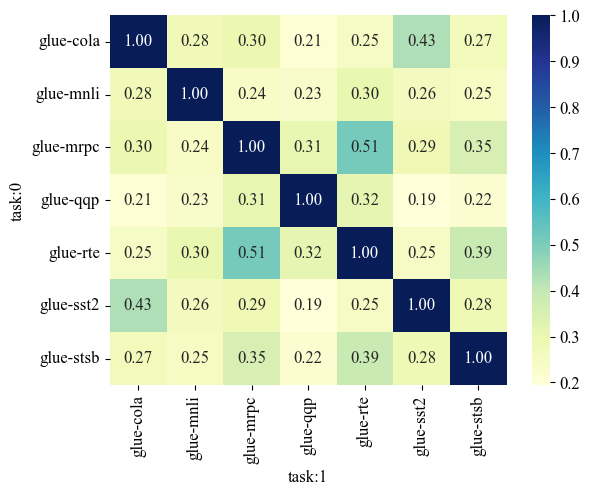

In [21]:
sns.heatmap(
    results.pivot(index="task:0", columns="task:1", values="cosine_similarity"),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
)
plt.show()

## LoRA

In [34]:
lora_results = results = compute_cos_similarity_as_df(lora_task_vector)

0it [00:00, ?it/s]

7it [00:00, 264.86it/s]


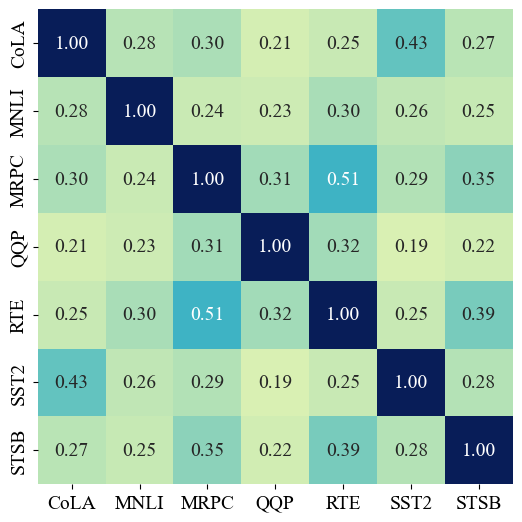

In [74]:
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.size"] = 14

fig, axes = plt.subplots(
    1,
    1,
    figsize=(5.1, 5),
    squeeze=False,
)
ax: plt.Axes = sns.heatmap(
    lora_results.pivot(index="task:0", columns="task:1", values="cosine_similarity"),
    annot=True,
    fmt=".2f",
    ax=axes[0, 0],
    cmap="YlGnBu",
    xticklabels=["CoLA", "MNLI", "MRPC", "QQP", "RTE", "SST2", "STSB"],
    yticklabels=["CoLA", "MNLI", "MRPC", "QQP", "RTE", "SST2", "STSB"],
    vmin=0,
    vmax=1,
    cbar=False,
)
ax.set_aspect("equal")
ax.set_xlabel("")
ax.set_ylabel("")
plt.subplots_adjust(left=0.05, right=1, top=1, bottom=0.05)
plt.savefig("results/flan-t5-base/lora_task_vecot_cos.pdf")
plt.show()

## L-LoRA

In [36]:
l_lora_results = results = compute_cos_similarity_as_df(l_lora_task_vector)

7it [00:00, 256.99it/s]


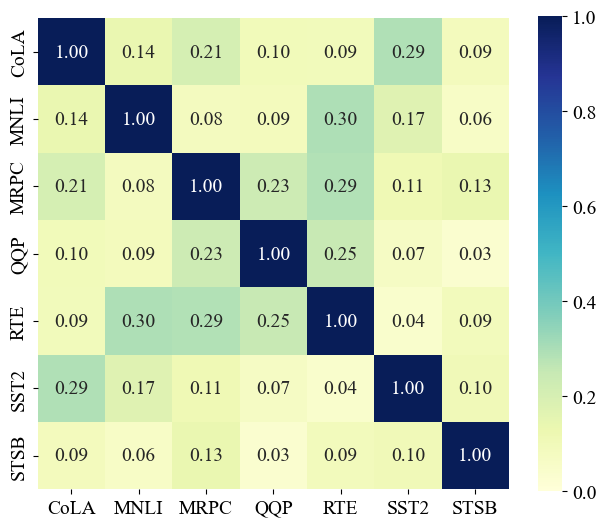

In [72]:
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.size"] = 14

fig, axes = plt.subplots(1, 1, squeeze=False, figsize=(6.2, 5))
ax = sns.heatmap(
    l_lora_results.pivot(index="task:0", columns="task:1", values="cosine_similarity"),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    xticklabels=["CoLA", "MNLI", "MRPC", "QQP", "RTE", "SST2", "STSB"],
    yticklabels=["CoLA", "MNLI", "MRPC", "QQP", "RTE", "SST2", "STSB"],
    vmin=0,
    vmax=1,
)
ax.set_aspect("equal")
ax.set_xlabel("")
ax.set_ylabel("")
plt.subplots_adjust(left=0.05, right=1, top=1, bottom=0.05)
plt.savefig("results/flan-t5-base/l_lora_task_vecot_cos.pdf")
plt.show()

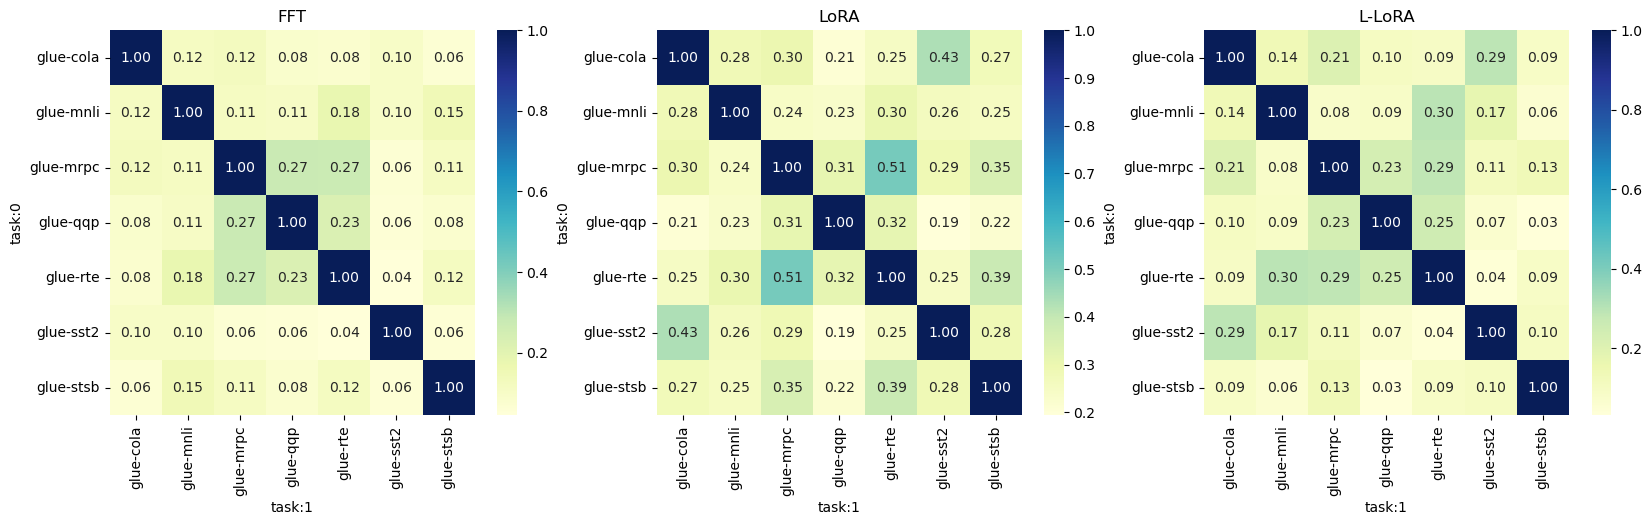

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(
    fft_results.pivot(index="task:0", columns="task:1", values="cosine_similarity"),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    ax=axes[0],
)
axes[0].set_title("FFT")
sns.heatmap(
    lora_results.pivot(index="task:0", columns="task:1", values="cosine_similarity"),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    ax=axes[1],
)
axes[1].set_title("LoRA")
sns.heatmap(
    l_lora_results.pivot(index="task:0", columns="task:1", values="cosine_similarity"),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    ax=axes[2],
)
axes[2].set_title("L-LoRA")
plt.show()

In [53]:
fft_results.to_csv("results/flan-t5-base/fft_cos_similarity.csv")
lora_results.to_csv("results/flan-t5-base/lora_cos_similarity.csv")
l_lora_results.to_csv("results/flan-t5-base/l_lora_cos_similarity.csv")

In [58]:
val_datasets = {d: val_loaders[d] for d in DATASET_NAMES}

In [59]:
val_datasets

{'glue-cola': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa13fed1cf0>,
 'glue-mnli': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa0da7793c0>,
 'glue-mrpc': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa0da4356f0>,
 'glue-qqp': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa0db04d810>,
 'glue-rte': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa0da4ad660>,
 'glue-sst2': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa0da578160>,
 'glue-stsb': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa0da57b430>}